In [2]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_test.shape

11490434/11490434 [==============================] - 1s 0us/step


(10000, 28, 28)

In [3]:
from keras.utils.data_utils import random
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 6 tane imaj 
# random seçicez
# göstermesi

for i in range(0,6):

  rand_num = random.randint(0,len(x_train))
  img = x_train[rand_num]
  cv2_imshow(img)


In [4]:
img_rows=x_train[0].shape[0]
img_cols=x_train[1].shape[1]

x_train=x_train.reshape(len(x_train),img_rows,img_cols,1)
x_test=x_test.reshape(len(x_test),img_rows,img_cols,1)

x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

x_train /= 255
x_test /= 255

y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [5]:
from keras.utils import np_utils

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

y_test
num_classes = y_test.shape[1]

num_classes

10

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 256)               1638656   
                                                        

In [10]:
batch_size = [32,64,128,256,512,1024]
epochs = 10

for i in batch_size:
    history = model.fit(x_train, y_train, batch_size=i,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2863 - accuracy: 0.9158 - val_loss: 0.1757 - val_accuracy: 0.9473
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2792 - accuracy: 0.9180 - val_loss: 0.1730 - val_accuracy: 0.9484
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2745 - accuracy: 0.9186 - val_loss: 0.1696 - val_accuracy: 0.9491
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2701 - accuracy: 0.9195 - val_loss: 0.1671 - val_accuracy: 0.9500
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2646 - accuracy: 0.9220 - val_loss: 0.1638 - val_accuracy: 0.9515
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2574 - accuracy: 0.9238 - val_loss: 0.1613 - val_accuracy: 0.9518
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2563 - accuracy: 0.9240 - val_loss: 0.1592 - val_ac

In [17]:
batch_size = [32,64,128,256,512,1024]
epochs = 10
history = [1,2,3,4,5,6]

for i in range(6):
    history[i] = model.fit(x_train, y_train, batch_size=batch_size[i],epochs=epochs,verbose=1,validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1884 - accuracy: 0.9435 - val_loss: 0.1163 - val_accuracy: 0.9643
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1879 - accuracy: 0.9455 - val_loss: 0.1157 - val_accuracy: 0.9640
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1854 - accuracy: 0.9457 - val_loss: 0.1151 - val_accuracy: 0.9645
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1799 - accuracy: 0.9466 - val_loss: 0.1144 - val_accuracy: 0.9651
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1858 - accuracy: 0.9460 - val_loss: 0.1128 - val_accuracy: 0.9650
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1810 - accuracy: 0.9471 - val_loss: 0.1121 - val_accuracy: 0.9651
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1777 - accuracy: 0.9469 - val_loss: 0.1115 - val_acc

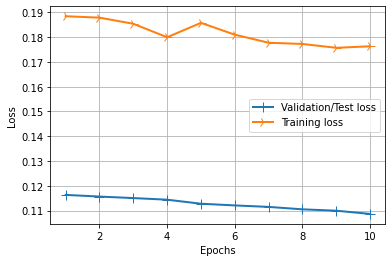

In [20]:
history_dict = history[0].history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test loss')
line2 = plt.plot(epochs, loss_values, label='Training loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()